link dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

**URUTAN PENGERJAAN**
- EDA sebelum clustering: Scatterplot, Bar chart, Pie chart, dll
- Feature Engineering (handling outlier, handling miss val, scaling, PCA)
- Analisa cluster (elbow method & silihoutte score)
- K-Means model with Final cluster
- visualisasi data 2D hasil cluster dengan pca(n_com=2)
- Analisis Hasil dari cluster, berdasarkan data yang kalian gunakan.

# Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import json
import pickle

# Data loading

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/hanarifdahs/datasets/master/Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Rename Columns

df= df.rename(columns={'Annual Income (k$)': 'annual_income',
                       'Spending Score (1-100)': 'spending_score'})

df['Gender'].replace(['Female','Male'], [1,0], inplace=True)

df.head()

,CustomerID,Gender,Age,annual_income,spending_score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'annual_income', 'spending_score'], dtype='object')

In [ ]:
#Define which one is numerical and categorical

num_cols= ['Age', 'annual_income', 'spending_score']
cat_cols= ['Gender']

In [ ]:
df[num_cols].describe()

,Age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#EDA

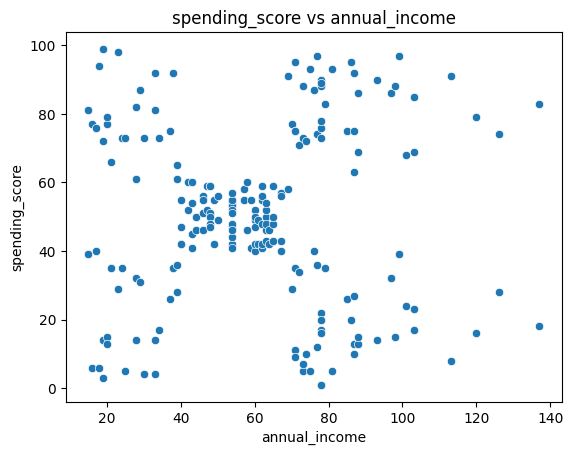

In [ ]:
#Scatterplot between Annual Income and Spending Score

sns.scatterplot(data=df,x='annual_income', y='spending_score')
plt.title('spending_score vs annual_income');

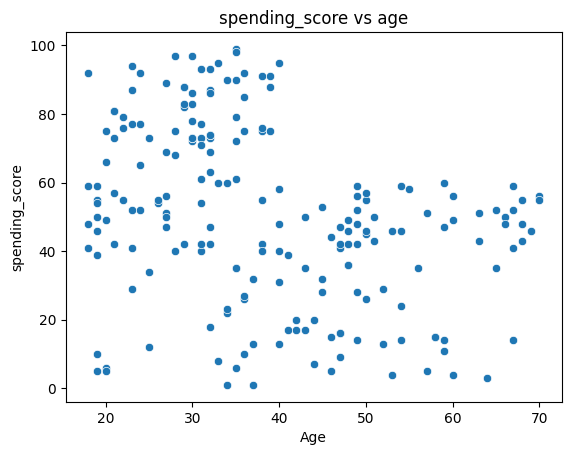

In [ ]:
#Scatterplot between Age and Spending Score

sns.scatterplot(data=df,x='Age', y='spending_score')
plt.title('spending_score vs age');

In [ ]:
#See correlation with pearson between all variables

df[num_cols].corr()

,Age,annual_income,spending_score
Age,1.000000,-0.012398,-0.327227
annual_income,-0.012398,1.000000,0.009903
spending_score,-0.327227,0.009903,1.000000


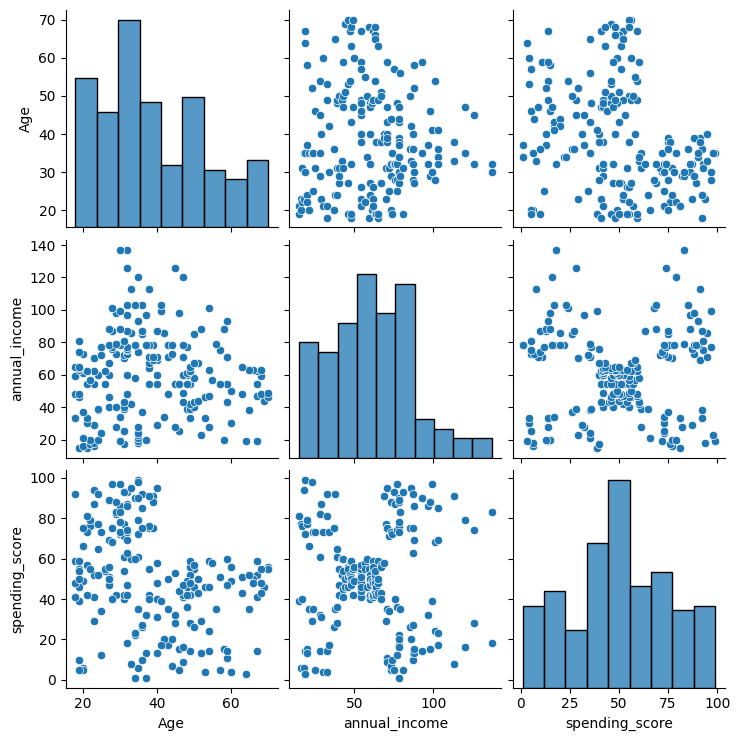

In [ ]:
#Pairplot untuk numerical kolom
sns.pairplot(df[num_cols]);

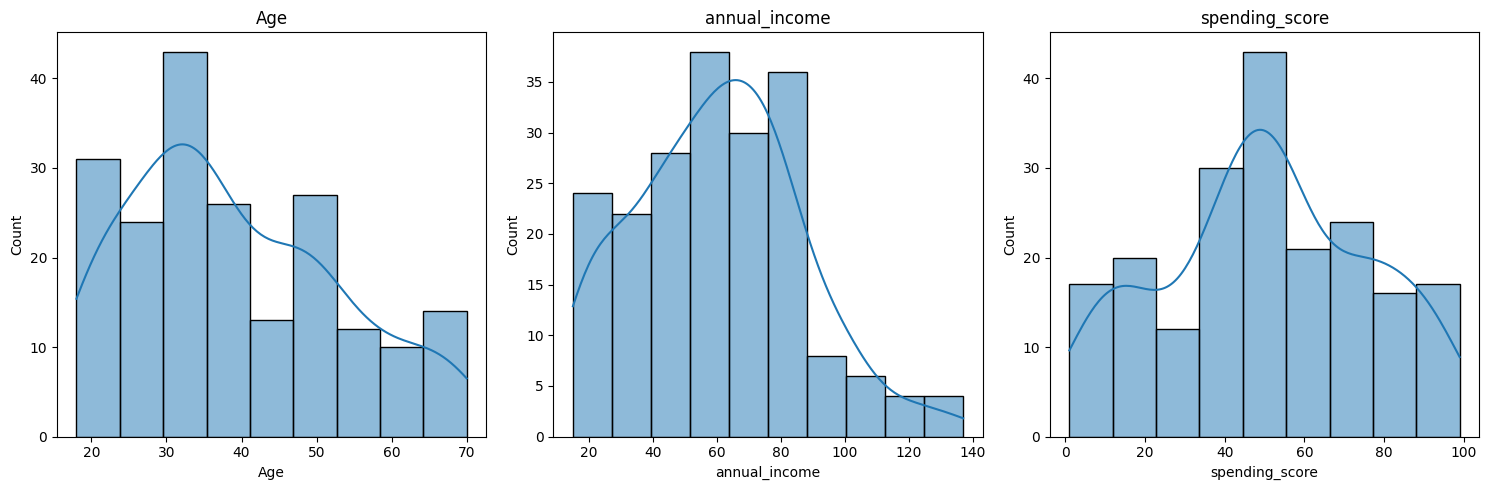

In [ ]:
#Melihat distribusi tiap kolom

# buat figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms dgn KDE
for i, column in enumerate(['Age', 'annual_income', 'spending_score']):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)

# Display plot
plt.tight_layout() # secara otomatis mengoptimalkan ruang di antara subplot agar tidak ada tumpang tindih
plt.show()

Hasil Pemangatan:
- rentang usia umur pelanggannya dari 20 sampai 70, terbanyak umur kisayan 30-35.
- frekuensi pelanggan yg memiliki pendapatan paling tinggi ada pada rentang?
- spending score paling tinggi ada pada rentang berapa?


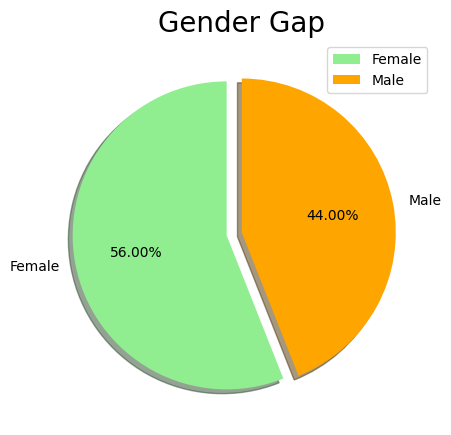

In [ ]:
#Melihat presentase gender pada data

labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0.1, 0]

fig, axes = plt.subplots(figsize=(6, 5))
plt.pie(size, colors = colors, explode = explode,
        labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.legend()
plt.show()

Kebanyakan di Mall itu Perempuan dibandingkan laki-laki

<ipython-input-15-15db361f1210>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Age'], palette = 'hsv')


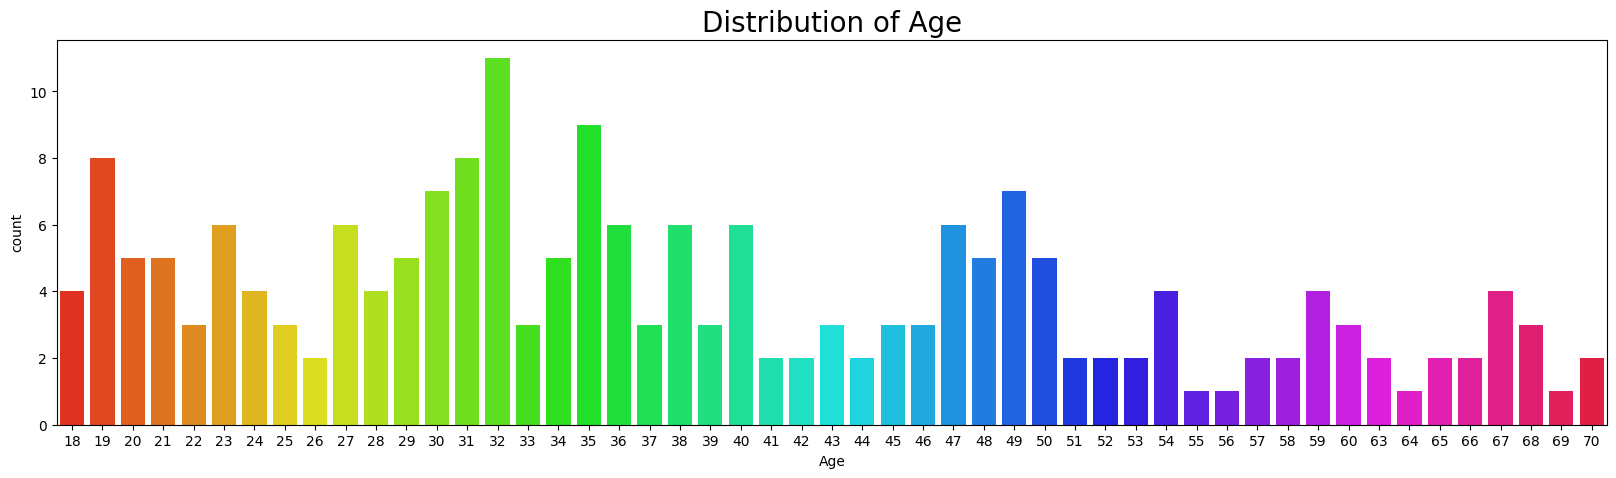

In [ ]:
#Melihat distribusi umur

plt.figure(figsize=(20,5))
sns.countplot(x=df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

In [ ]:
#dibuat range umur

bins = [17, 25, 33, 46, 80]

df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=['18-25', '26-33', '34-46', '47-80'])

df.head()

,CustomerID,Gender,Age,annual_income,spending_score,Age Category
0,1,0,19,15,39,18-25
1,2,0,21,15,81,18-25
2,3,1,20,16,6,18-25
3,4,1,23,16,77,18-25
4,5,1,31,17,40,26-33


In [ ]:
df.query('Age==18')

,CustomerID,Gender,Age,annual_income,spending_score,Age Category
33,34,0,18,33,92,18-25
65,66,0,18,48,59,18-25
91,92,0,18,59,41,18-25
114,115,1,18,65,48,18-25


<ipython-input-18-fc593a5b78dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Age Category'], palette = 'hsv')


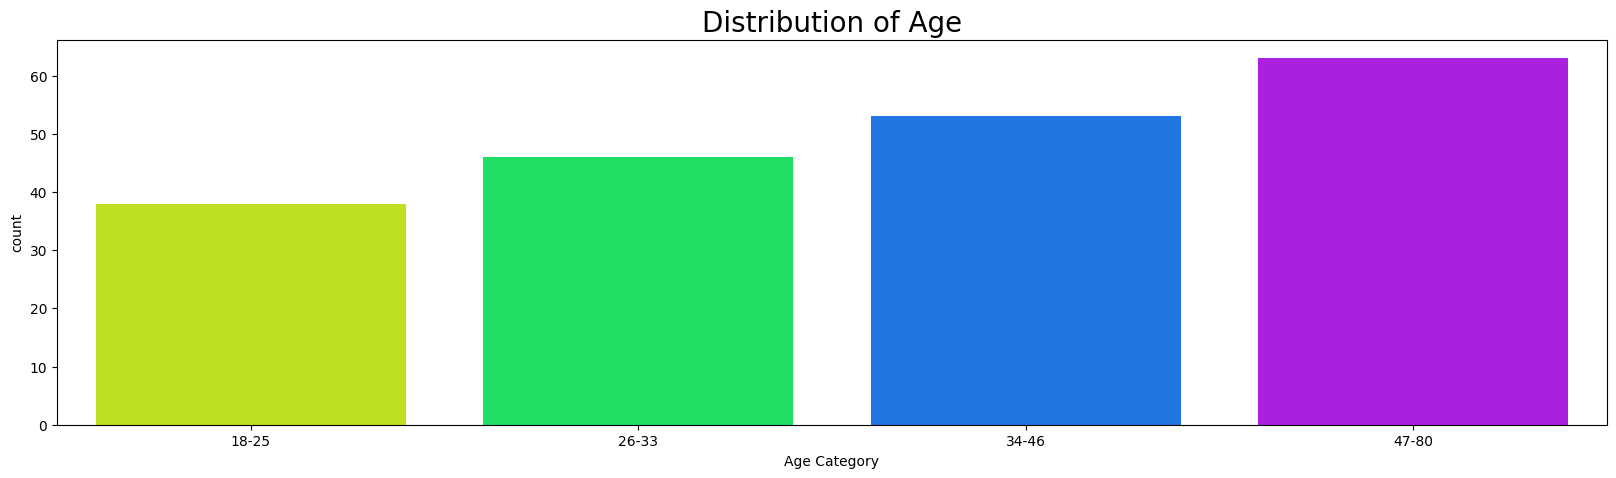

In [ ]:
#Membandingkan distribusi umur berdasarkan rangenya

plt.figure(figsize=(20,5))
sns.countplot(x=df['Age Category'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

<ipython-input-19-8240e0eeb2fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x= df['Gender'], y= df['spending_score'], palette='Blues')


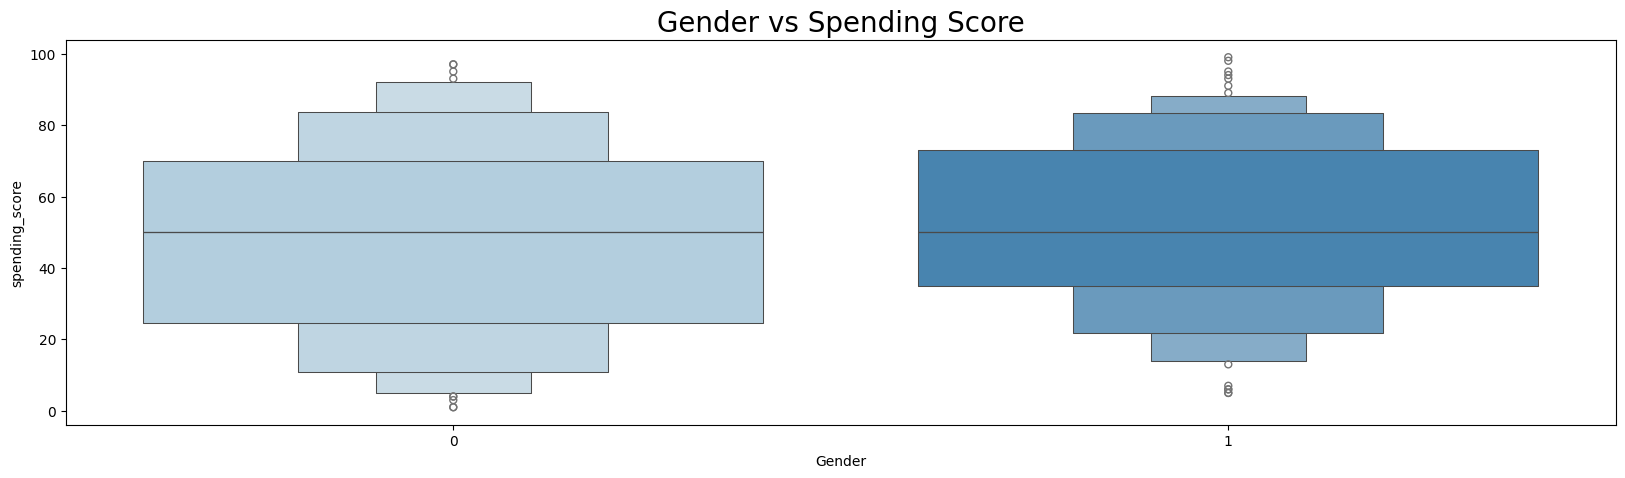

In [ ]:
#  Melihat distribusi antara gender dan spending score
plt.figure(figsize=(20,5))
sns.boxenplot(x= df['Gender'], y= df['spending_score'], palette='Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Hasil pengataman:
- Perempuan memiliki spending score lebih tinggi dari laki-laki berdasarkan mediannya.
- kebanyakan laki-laki spending scorenya pada rentang 25-70.

#Feature Engineering

In [ ]:
#Hanya diguunakan kolom numerical

X = df[num_cols]

print(X.shape)

(200, 3)


##Handling Outlier

In [ ]:
!pip install -q feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=1.5,
                          variables=['annual_income','spending_score'])

windsoriser.fit(X)

X = windsoriser.transform(X)

##Handling Missing Value

In [ ]:
X.isnull().sum()

Age               0
annual_income     0
spending_score    0
dtype: int64

##Scalling

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA

In [ ]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

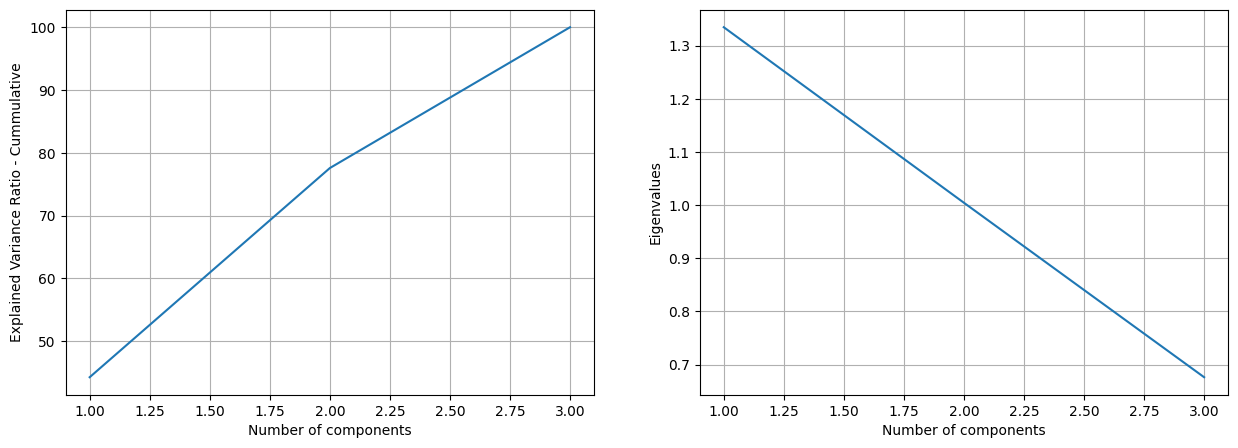

In [ ]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 4), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 4), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [ ]:
# Check the number of features if we want to retain 75 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.75) + 1
num_features

2

In [ ]:
# Let's train the model with reducing to 2 component

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_scaled_pca = pca.transform(X_scaled)

# Model

- K-Means

**Catatan:**

- K-Means umumnya lebih bagus kalau udh tangani outlier. Pengecekan outlier bisa menggunakan Z-score, IQR dll. Kalau gak mau tangani outlier jg bisa. Kembali lagi ke analisis dan tujuan yg ingin dicapai.
- Evaluasi model K-Means:
  - Elbow
  - Silhouette

## K-Means

- Tidak Cocok untuk data kategori, karena perhitungan jarak dgn  Euclidian distance tidak terlalu bermakna apabila data kategori walaupun sudah di encoding.
- Jadi gunakan K-Means pada data numerikal
- Untuk data kategori bisa dengan `k-Modes`, didasarkan pada paradigma algoritma k-Means dan digunakan untuk mengelompokkan kategori data.
- Ada juga `k-Prototype`, algoritma ini adalah metode pengelompokan berdasarkan partisi. Algoritma ini merupakan penyempurnaan dari algoritma clustering K-Means dan K-Mode

### Elbow Method

Keterangan Parameter pada KMeans:
- **max_iter** adalah parameter yang mengontrol jumlah iterasi yang dilakukan oleh algoritma K-means untuk mencapai konvergensi. Secara umum, iterasi dilakukan untuk **mengoptimalkan posisi pusat kluster (centroid) dan label kluster** untuk setiap sampel data. Jika iterasi mencapai batas **max_iter** sebelum konvergensi tercapai, algoritma akan berhenti dan mengembalikan solusi yang terbaik yang ditemukan sampai saat itu.

- **n_init** adalah parameter yang mengontrol jumlah inisialisasi yang berbeda yang dilakukan oleh algoritma K-means. K-means secara acak memilih titik awal pusat kluster dan melakukan iterasi untuk mengoptimalkannya. Dengan mengatur n_init ke nilai yang lebih besar, algoritma akan mencoba untuk memulai dengan titik awal yang berbeda secara acak dan menghasilkan solusi terbaik berdasarkan inisialisasi tersebut. Hasil terbaik di antara semua inisialisasi akan dianggap sebagai solusi akhir yang dikembalikan oleh algoritma. **Singkatnya n_init melakukan inisialisasi ulang sebanyak 10 kali dengan titik awal pusat kluster yang berbeda secara acak.**

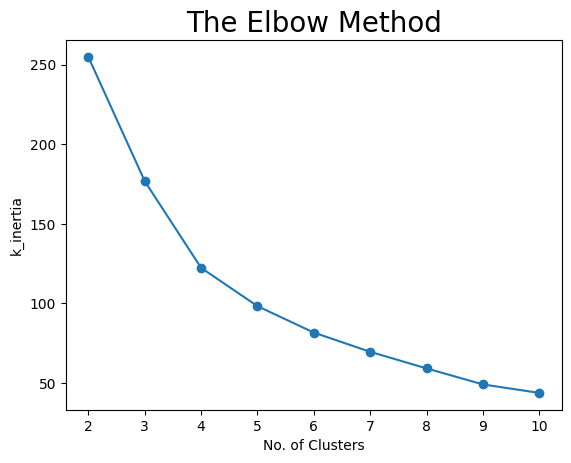

In [ ]:
k_inertia = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(X_scaled_pca)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

Dari hasil visualisasi diatas sekilas kita mendapatkan nilai k=4, dimana penurunan inersianya tidak lagi signifikan setelah nilai k=4

### Silhouette Score

In [ ]:
# Function to create Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.42503476465070333
For n_clusters = 3 The average silhouette_score is : 0.4138451617674843
For n_clusters = 4 The average silhouette_score is : 0.42192533360463585
For n_clusters = 5 The average silhouette_score is : 0.3904485277223029


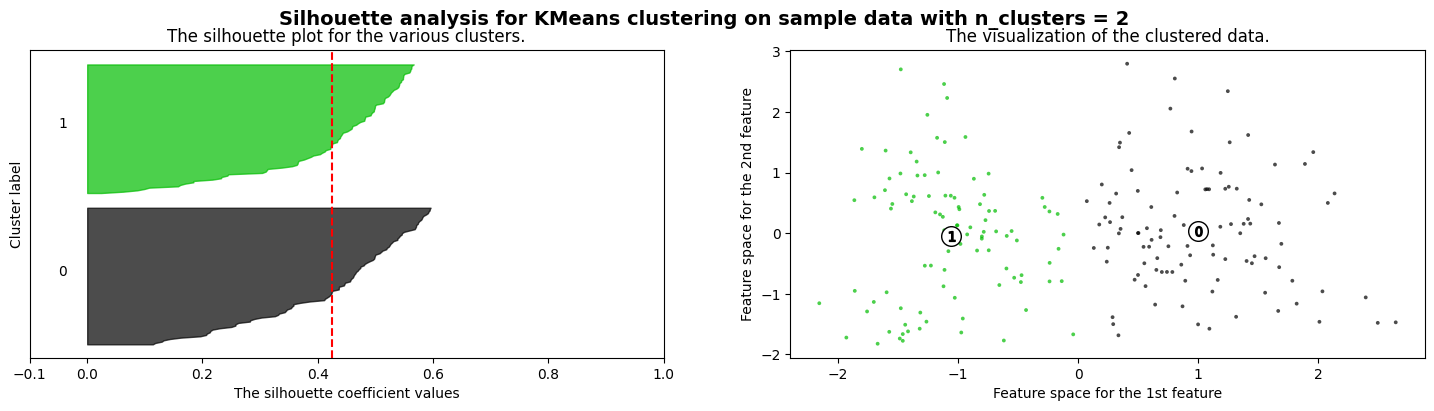

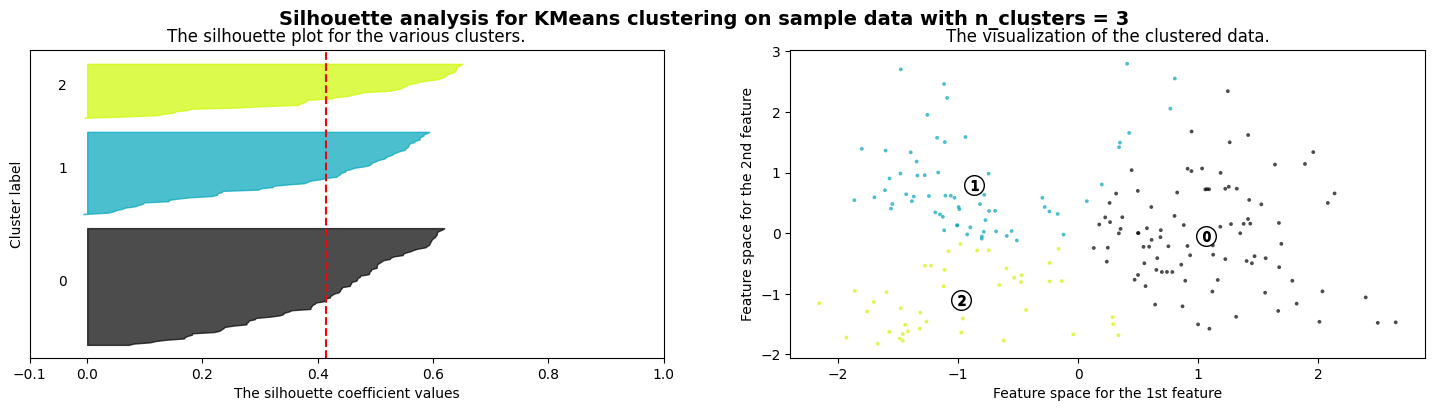

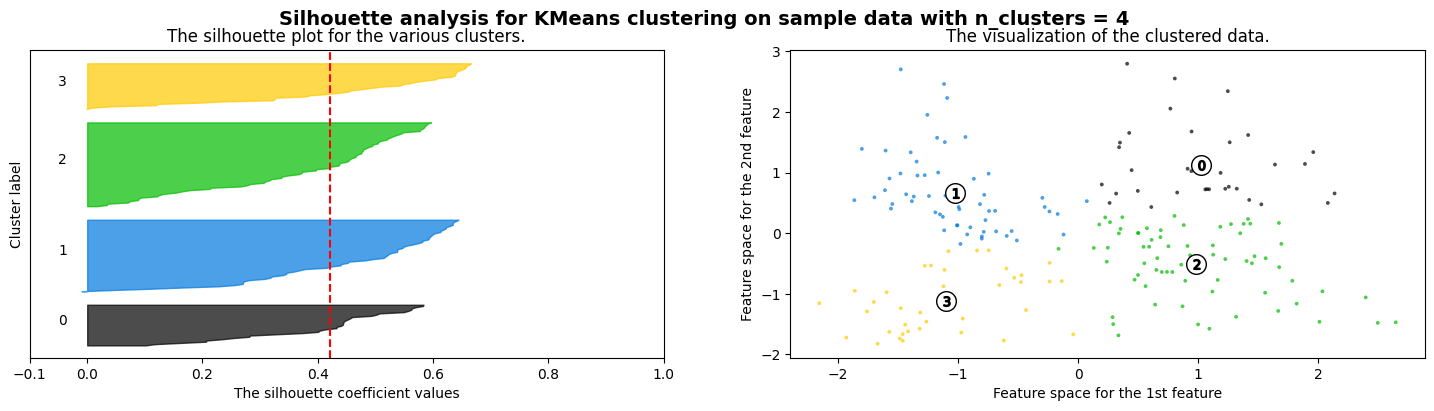

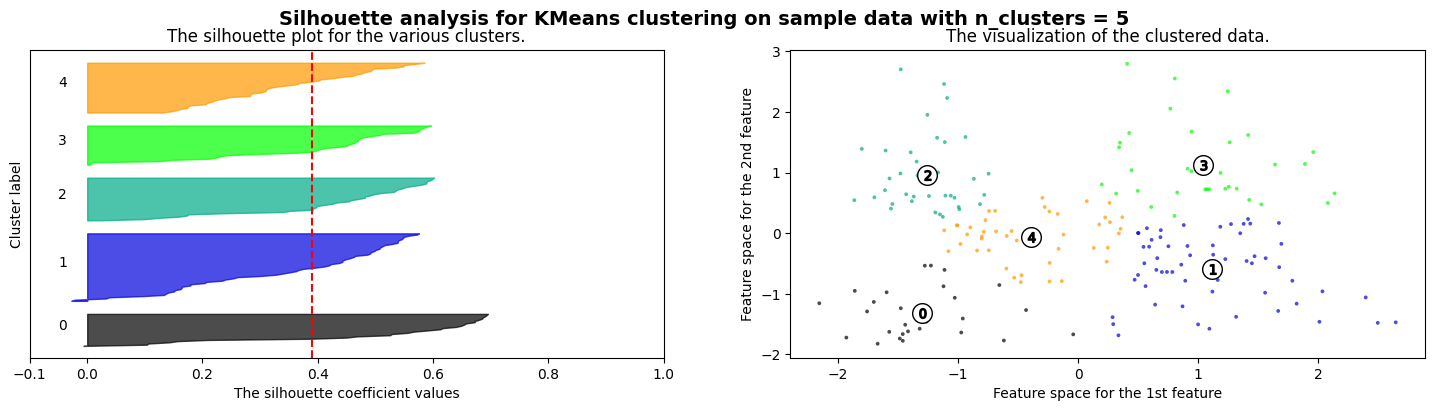

In [ ]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, 6), X_scaled_pca, 3)

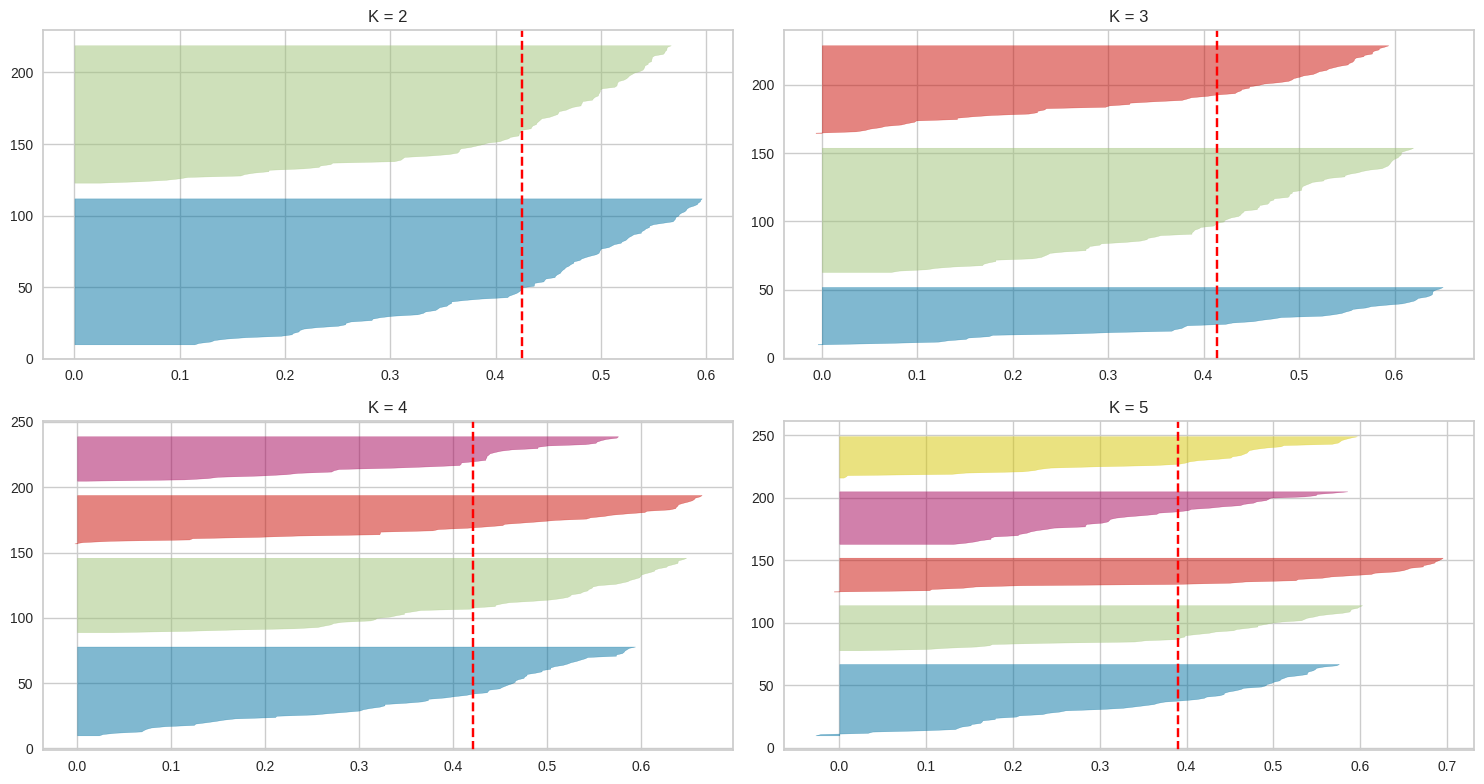

In [ ]:
#Silhoutte Plot Analysis

from yellowbrick.cluster import SilhouetteVisualizer
# Set up subplots
#diatur mau dicoba berapa cluster disini
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(X_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

### Final dengan K=4

In [ ]:
km = KMeans(n_clusters = 4, random_state = 3)
km.fit(X_scaled_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=3)

In [ ]:
pred = km.predict(X_scaled_pca)
pred

array([3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [ ]:
#iterasi keberapa dia konvergen

km.n_iter_

8

In [ ]:
# Insert clustering result into original dataset

df_kmeans = df.copy() #ini biar nyoba2 model lain
df_kmeans['cluster'] = pred
df_kmeans

,CustomerID,Gender,Age,annual_income,spending_score,Age Category,cluster
0,1,0,19,15,39,18-25,3
1,2,0,21,15,81,18-25,3
2,3,1,20,16,6,18-25,2
3,4,1,23,16,77,18-25,3
4,5,1,31,17,40,26-33,3
...,...,...,...,...,...,...,...
195,196,1,35,120,79,34-46,1
196,197,1,45,126,28,34-46,0
197,198,0,32,126,74,26-33,1
198,199,0,32,137,18,26-33,0


# EDA After Clustering

### Visualisasi Hasil Cluster

<Axes: >

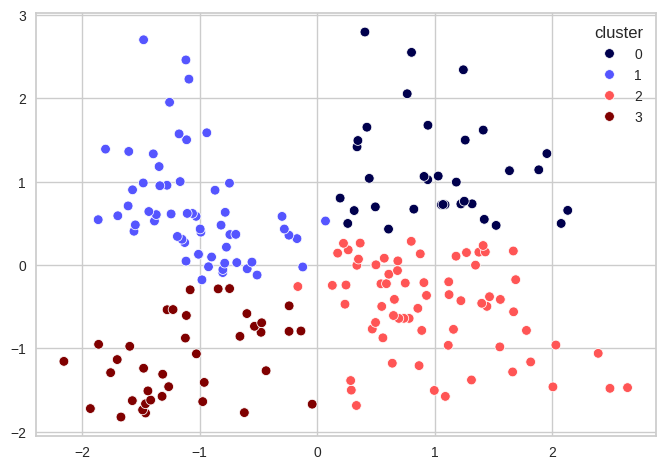

In [ ]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(X_scaled)

X_scaled_pca_2d = pca_2d.fit_transform(X_scaled)

#scatter PC1 & PC2
sns.scatterplot(x=X_scaled_pca_2d[:,0], y=X_scaled_pca_2d[:,1], hue=df_kmeans['cluster'], palette='seismic')

### Distribusi antara banyaknya spending dan income per cluster

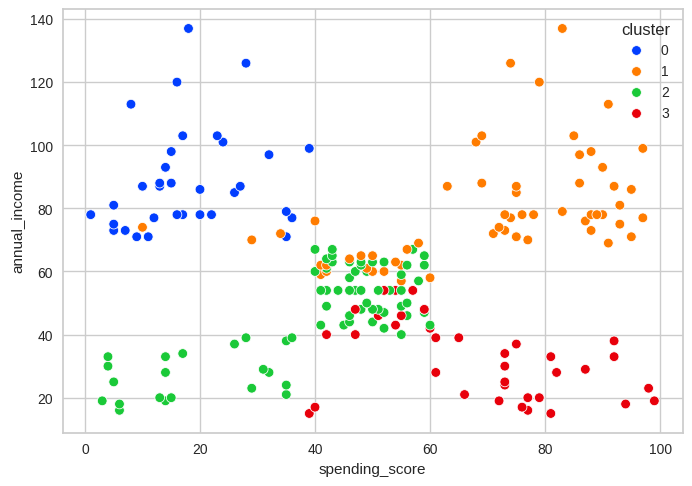

In [ ]:
sns.scatterplot(data=df_kmeans, x="spending_score", y="annual_income", hue="cluster",palette="bright");

Analisis:
- Di **cluster 2** kita dapat melihat orang-orang memiliki pendapatan tahunan yang rendah dan skor pengeluaran yang rendah, ini cukup masuk akal karena orang-orang yang memiliki gaji rendah lebih suka membeli lebih sedikit, sebenarnya, ini adalah orang-orang bijak yang tahu cara membelanjakan dan menghemat uang . Toko-toko/mal akan paling tidak tertarik pada orang-orang yang termasuk dalam cluster ini.

- Di **cluster 3** kita dapat melihat bahwa orang-orang berpenghasilan rendah tetapi memiliki skor pengeluaran yang lebih tinggi, mereka adalah orang-orang yang karena alasan tertentu lebih suka membeli produk meskipun berpenghasilan rendah. Mungkin karena orang-orang ini lebih dari puas dengan layanan mal. Toko/mall mungkin tidak menargetkan orang-orang ini secara efektif tetapi tetap tidak akan kehilangan mereka.

- Di **cluster 1** kami melihat bahwa orang-orang memiliki pendapatan tinggi dan nilai pengeluaran tinggi, ini adalah kasus yang ideal untuk mal atau toko karena orang-orang ini adalah sumber keuntungan utama. Orang-orang ini mungkin pelanggan tetap mal dan yakin dengan fasilitas mal.


- Di **cluster 0**  kita lihat masyarakat berpenghasilan tinggi tapi pengeluarannya rendah, ini menarik. Mungkin ini orang-orang yang tidak puas atau tidak senang dengan pelayanan mall. Ini bisa menjadi target utama mal, karena berpotensi menghabiskan uang. Oleh karena itu, pihak pengelola mal akan berusaha menambah fasilitas baru agar dapat menarik minat masyarakat tersebut dan dapat memenuhi kebutuhannya.



### Perbandingan antara kategori umur dan banyaknya spending

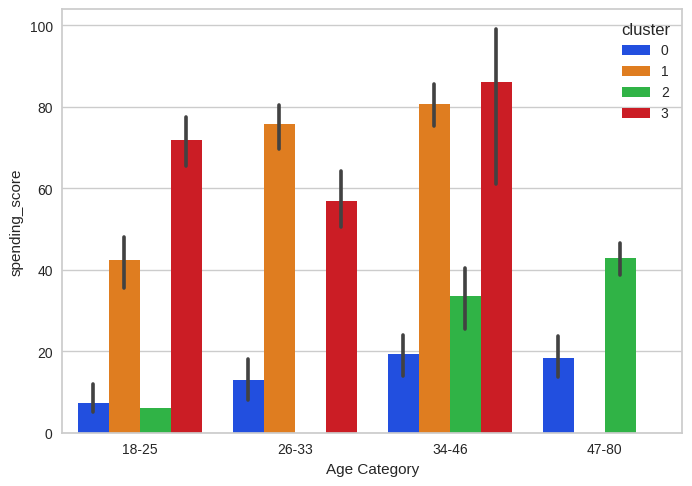

In [ ]:
sns.barplot(data=df_kmeans, x="Age Category", y="spending_score", hue="cluster",palette="bright");

#Save Model

In [ ]:
#Save Files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

with open('kmeans.pkl', 'wb') as file_4:
  pickle.dump(km, file_4)

# Referensi tambahan

- https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap
- https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb